# Introduction

**Deskripsi**<br>
* Membuat segmentasi pelanggan<br>
**Data**<br>
* Setiap baris mewakili pelanggan penerbangan, setiap kolom berisi atribut penumpang.<br>
* hanya menggunakan train.csv<br>
**Link Kaggle**<br>
* https://www.kaggle.com/c/sa-customer-segmentation<br>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.1
pandas version :  1.1.2
seaborn version :  0.11.0


# Data Collection

In [ ]:
data_train = pd.read_csv('data/flight_train.csv')
print(data_train.shape)
data_train.head(2)

(55000, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33


In [ ]:
data_test = pd.read_csv('data/flight_test.csv')
print(data_test.shape)
data_test.head(2)

(7988, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,27355,9/19/2011,6/2/2012,Male,4,nanjing,jiangsu,CN,29.0,3/31/2014,...,0.0,2005,9/30/2012,549,120.0,120,0,1.000000,2879,6
1,4032,9/18/2012,9/18/2012,Female,4,changchunshi,jilinsheng,CN,43.0,3/31/2014,...,984.0,2301,2/4/2014,57,252.0,477,0,0.871291,1731,0


In [ ]:
data = pd.concat([data_train,data_test])
print(data.shape)
data.head()

(62988, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


#  Data Understanding

In [ ]:
print('Total Row',data.shape[0],'Total Feature ',data.shape[1])

Total Row 62988 Total Feature  23


In [ ]:
data[data.duplicated()==True]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


<B> - Data Description</b>

<li>MEMBER_NO-b : ID Member<br>
<li>FFP_DATE : Frequent Flyer Program Join Date<br>
<li>FIRST_FLIGHT_DATE : Penerbangan pertama    <br>
<li>GENDER : Jenis Kelamin <br>
<li>FFP_TIER  : Tier dari Frequent Flyer Program<br>
<li>WORK_CITY : kota Asal<br>
<li>WORK_PROVINCE : provinsi asal<br>
<li>WORK_COUNTRY : negara asal<br>
<li>AGE : Umur <br>
<li>LOAD_TIME : ( observation window wnd time ) tanggal data diambil <br>
<li>FLIGHT_COUNT : Jumlah penerbangan Customer<br>
<li>BP_SUM : Rencana Perjalanan<br>
<li>SUM_YR_1 : fare revenue 1 (pendapatan)<br>
<li>SUM_YR_2 : votes price income (memilih pendapatan harga) <br>
<li>SEG_KM_SUM : total jarak(km) penerbangan yg sudah dilakukan<br>
<li>LAST_FLIGHT_DATE : tanggal penerbangan terakhir<br>
<li>LAST_TO_END :  Waktu dari waktu boarding terakhir hingga akhir jendela observasi<br>
<li>AVG_INTERVAL : rata-rata jarak waktu       <br>
<li>MAX_INTERVAL :  maksimum jarak waktu       <br>
<li>EXCHANGE_COUNT : Jumlah penukaran<br>
<li>avg_discount : rata rata discount yang didapat<br>
<li>Points_Sum : total point yang didapt members<br>
<li>Point_NotFlight : point yang tidak digunakan oleh members   <br>
<br>
References :<br>
<li>FFP_DATE : FFP-> https://javamilk.com/2014/05/26/mengenal-frequent-flyer-program/
<li>BP_SUM -> 

<b>Data Type Check</b>

In [ ]:
data.dtypes

MEMBER_NO              int64
FFP_DATE              object
FIRST_FLIGHT_DATE     object
GENDER                object
FFP_TIER               int64
WORK_CITY             object
WORK_PROVINCE         object
WORK_COUNTRY          object
AGE                  float64
LOAD_TIME             object
FLIGHT_COUNT           int64
BP_SUM                 int64
SUM_YR_1             float64
SUM_YR_2             float64
SEG_KM_SUM             int64
LAST_FLIGHT_DATE      object
LAST_TO_END            int64
AVG_INTERVAL         float64
MAX_INTERVAL           int64
EXCHANGE_COUNT         int64
avg_discount         float64
Points_Sum             int64
Point_NotFlight        int64
dtype: object

<b>Data Explore</b>

In [ ]:
columns = [x for x in data.columns]
percent=[]
for kolom in columns:
    percent.append(round(data[kolom].isnull().sum()/data[kolom].shape[0]*100, 2))
    
explore = data.describe(percentiles = [], include = 'all').T 
explore['missing'] = len(data) - explore['count'] 
explore['%'] = percent
explore = explore[['missing','%','min','max']] 

In [ ]:
explore = explore.replace(np.nan, '-', regex=True)
explore

,missing,%,min,max
MEMBER_NO,0.0,0.00,1,62988
FFP_DATE,0.0,0.00,-,-
FIRST_FLIGHT_DATE,0.0,0.00,-,-
GENDER,3.0,0.00,-,-
FFP_TIER,0.0,0.00,4,6
WORK_CITY,2269.0,3.60,-,-
WORK_PROVINCE,3248.0,5.16,-,-
WORK_COUNTRY,26.0,0.04,-,-
AGE,420.0,0.67,6,110
LOAD_TIME,0.0,0.00,-,-


--------------------------------------

# Data Preparation


## EDA

Ada terlalu banyak atribut di dalam data. Untuk menilai pelanggan, model RFM yang paling banyak digunakan <b>(R)</b> interval waktu konsumsi terkini, <b>(F)</b> frekuensi konsumsi, <b>(M)</b> jumlah konsumsi diidentifikasi.<br>
dilihat dari fitur yang ada, berdasarkan beragamnya harga tiket pesawat,pelanggan berbeda dengan jumlah pengeluaran yang sama pada maskapai bisa berarti memiliki nilai yang berbeda pula. Misalnya, penumpang yang membeli tiket kelas rendah dengan rute perjalanan yang jauh secara alami lebih berharga bagi maskapai penerbangan dibanding penumpang yang membeli tiket kelas atas dengan rute perjalanan yang pendek. Oleh karena itu, kami mengganti jumlah konsumsi (M) dengan jarak tempuh penerbangan M-(KM) dan koefisien diskon (C), dan menambahkan fiur durasi hubungan dengan maskapai (berapa lama terdaftar di maskapai) LENGTH, yang mewakili waktu bergabung ke program maskapai. Oleh karena itu, kami memodifikasi model RFM menjadi model LRFMC.

EDA akan berfokus pada fitur RFM


<p><b>L ( Length Relation )</b><br>Lama customer sudah berhubungan dengan perusahaan airline, nilai ini bisa di dapat dari LOAD_TIME ( waktu data terakhir disimpan) - ( dikurang) FFP_DATE ( customer terdaftar di program airline tersebut</p>
<p><b>R ( Recency )</b><br>
keterbaruan atau terakhir customer menggunakan maskapai tsb</p>
<p><b>F ( Frequency )</b><br>
tingkat keseringan/sudah berapa kali pelanggan menggunakan maskapai tsb</p>
<p><b>M ( Monetary Value )</b><br>
total jarak perjalanan yang sudah dilakukan
<p><b>C ( Coeeficient Value )</b><br>
Koefisien rata rata diskon yang di dapat pelanggan

pada check missing value ditemukan data abnormal yaitu pada data di SUM_YR_1 & SUM_YR_2 banyak yang idak terisi yang berarti adanya kemungkinan data tidak diinput dengan benar, untuk mengurangi resiko data yang buruk dan karena data ini berjumlah banyak saya memutuskan untuk menghapus SUM_YR_1 & SUM_YR_2 yang memiliki nilai yang kosong

In [ ]:
data = data[data['SUM_YR_1'].notnull()]
data = data[data['SUM_YR_2'].notnull()]

### Recency ( LAST_TO_END )

In [ ]:
data['LAST_TO_END'].describe()

count    62299.000000
mean       172.787541
std        181.275570
min          1.000000
25%         29.000000
50%        105.000000
75%        261.000000
max        731.000000
Name: LAST_TO_END, dtype: float64

In [ ]:
data['LAST_TO_END'].isnull().value_counts()

False    62299
Name: LAST_TO_END, dtype: int64

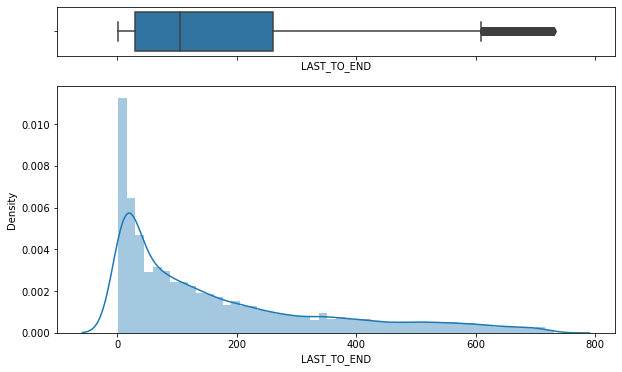

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['LAST_TO_END'], ax=ax_box)
sns.distplot(data['LAST_TO_END'], ax=ax_hist)
plt.show()

### Frequency ( FlIGHT_COUNT )

In [ ]:
data['FLIGHT_COUNT'].describe()

count    62299.000000
mean        11.941107
std         14.091654
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

In [ ]:
data['FLIGHT_COUNT'].isnull().value_counts()

False    62299
Name: FLIGHT_COUNT, dtype: int64

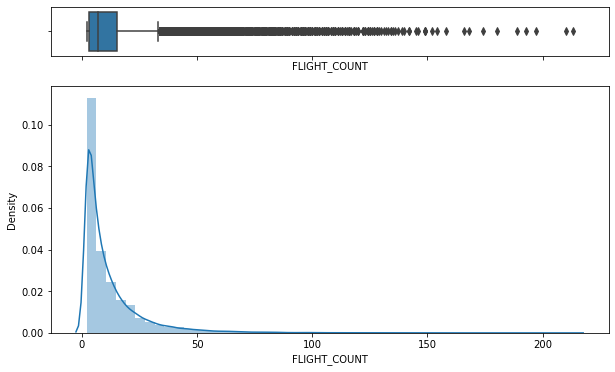

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['FLIGHT_COUNT'], ax=ax_box)
sns.distplot(data['FLIGHT_COUNT'], ax=ax_hist)
plt.show()

### Monetary ( SEG_KM_SUM )

In [ ]:
data['SEG_KM_SUM'].describe()

count     62299.000000
mean      17275.697315
std       21024.229954
min         368.000000
25%        4852.000000
50%       10163.000000
75%       21449.000000
max      580717.000000
Name: SEG_KM_SUM, dtype: float64

In [ ]:
data['SEG_KM_SUM'].isnull().value_counts()

False    62299
Name: SEG_KM_SUM, dtype: int64

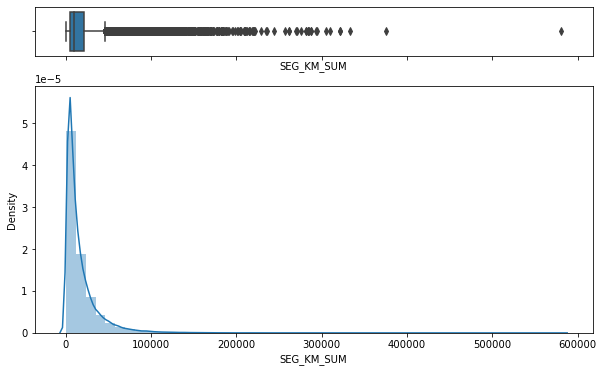

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['SEG_KM_SUM'], ax=ax_box)
sns.distplot(data['SEG_KM_SUM'], ax=ax_hist)
plt.show()

### Length( FFP_DATE - LOAD_TIME )

In [ ]:
data[['FFP_DATE','LOAD_TIME']].dtypes

FFP_DATE     object
LOAD_TIME    object
dtype: object

In [ ]:
#change data type object to datetime
data['FFP_DATE']=pd.to_datetime(data['FFP_DATE'])
data['LOAD_TIME']=pd.to_datetime(data['LOAD_TIME'])

In [ ]:
from datetime import datetime
def interval_time(dd):
    return dd.days

data['LENGTH']=np.abs(data['LOAD_TIME']-data['FFP_DATE'])
data['LENGTH']=data['LENGTH'].apply(interval_time)

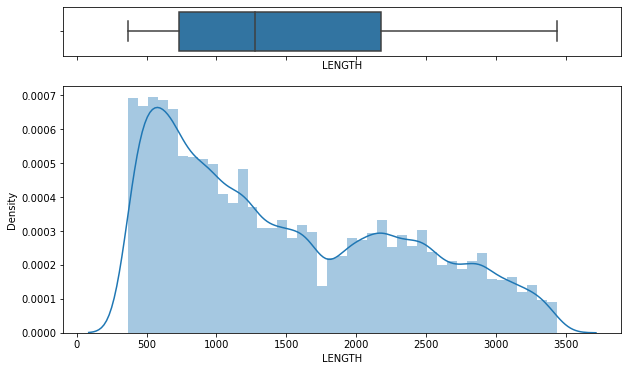

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['LENGTH'], ax=ax_box)
sns.distplot(data['LENGTH'], ax=ax_hist)
plt.show()

### Coeficient ( Avg_Discount )

In [ ]:
data['avg_discount'].describe()

count    62299.000000
mean         0.721861
std          0.185031
min          0.000000
25%          0.612698
50%          0.712000
75%          0.809140
max          1.500000
Name: avg_discount, dtype: float64

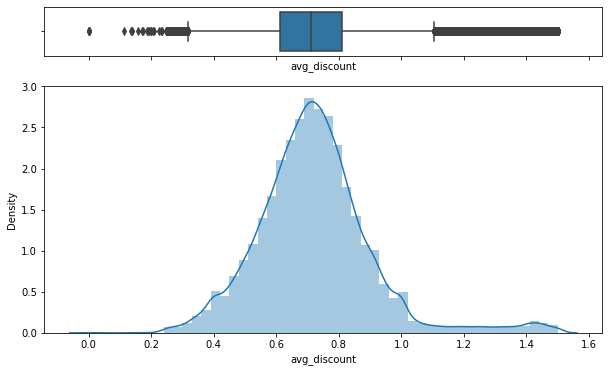

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['avg_discount'], ax=ax_box)
sns.distplot(data['avg_discount'], ax=ax_hist)
plt.show()

In [ ]:
index1=data['SUM_YR_1'] !=0
index2=data['SUM_YR_2'] !=0
index3=(data['SEG_KM_SUM'] ==0)*(data['avg_discount']==0)

In [ ]:
data=data[index1|index2|index3]

In [ ]:
print(data.shape)

(62044, 24)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62044 entries, 0 to 7978
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62044 non-null  int64         
 1   FFP_DATE           62044 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62044 non-null  object        
 3   GENDER             62041 non-null  object        
 4   FFP_TIER           62044 non-null  int64         
 5   WORK_CITY          59791 non-null  object        
 6   WORK_PROVINCE      58831 non-null  object        
 7   WORK_COUNTRY       62018 non-null  object        
 8   AGE                61632 non-null  float64       
 9   LOAD_TIME          62044 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62044 non-null  int64         
 11  BP_SUM             62044 non-null  int64         
 12  SUM_YR_1           62044 non-null  float64       
 13  SUM_YR_2           62044 non-null  float64       
 14  SEG_KM_

## Data Preproccesing

In [ ]:
data_=data.copy()

In [ ]:
df_lrfmc=data[['MEMBER_NO','LENGTH','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_lrfmc.columns = ['MEMBER_NO','L','R','F','M','C']
df_lrfmc_drop=df_lrfmc[['L','R','F','M','C']]

In [ ]:
df_lrfmc_drop.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [ ]:
df_lrfmc_drop.describe()

,L,R,F,M,C
count,62044.00000,62044.000000,62044.000000,62044.000000,62044.000000
mean,1488.69109,172.532703,11.971359,17321.694749,0.722180
std,847.88092,181.526164,14.110619,21052.728111,0.184833
min,365.00000,1.000000,2.000000,368.000000,0.136017
25%,735.00000,29.000000,3.000000,4874.000000,0.613085
50%,1278.00000,105.000000,7.000000,10200.000000,0.712162
75%,2182.00000,260.000000,15.000000,21522.500000,0.809293
max,3437.00000,731.000000,213.000000,580717.000000,1.500000


## - Outlier Treatment

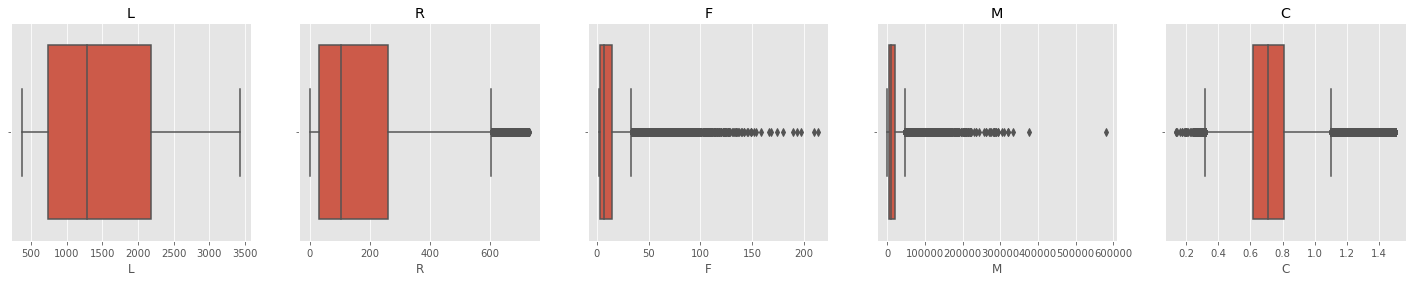

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(df_lrfmc_drop[col])
        plt.title(col)
        i = i+1     
dist_list(LRFM)

dari grafik distibusi diatas bisa disimpulkan data banyak outlier hingga distrubusi data nya negatif atau skewnes

In [ ]:
rfm_log=df_lrfmc_drop.copy()

In [ ]:
cols=['R','F','M','C']
for col in cols:
    high_cut = rfm_log[col].quantile(q=0.99)
    low_cut=rfm_log[col].quantile(q=0.01)
    rfm_log.loc[rfm_log[col]>high_cut,col]=high_cut
    rfm_log.loc[rfm_log[col]<low_cut,col]=low_cut


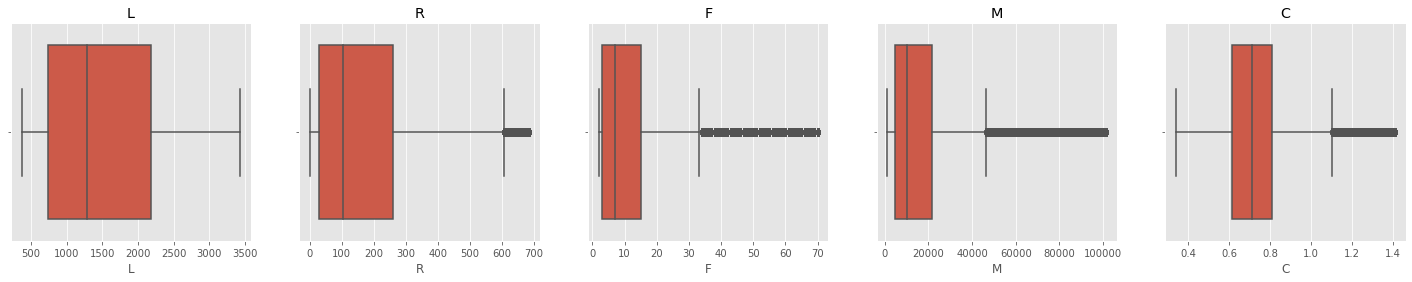

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(rfm_log[col])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [ ]:
rfm_log.shape

(62044, 5)

<b>Scaling</b>

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_std=rfm_log
scale = MinMaxScaler()
kolom_all = [x for x in df_std.columns]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))

In [ ]:
df_std.head()

,L,R,F,M,C
0,0.762044,0.000000,1.000000,1.0,0.581189
1,0.726563,0.008772,1.000000,1.0,0.852707
2,0.732422,0.014620,1.000000,1.0,0.854912
3,0.547526,0.140351,0.308824,1.0,0.701902
4,0.472331,0.005848,1.000000,1.0,0.589613


# Modeling

## - K MEANS

<b>Description Model</b>

K-means Clustering adalah salah satu “unsupervised machine learning algorithms” yang paling sederhana dan populer .Tujuan dari algoritma ini adalah untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K. Variabel K sendiri adalah jumlah cluster yang kita inginkan

<b>Elbow Method to get best number for K Means</b>

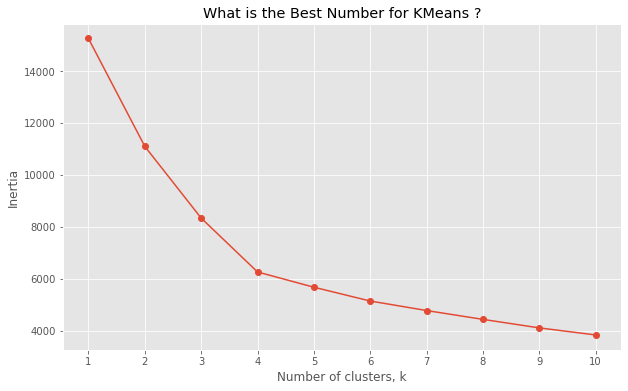

In [ ]:
from sklearn.cluster import KMeans
ks = range(1,11)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(df_std)
    cluster = kc.fit_predict(df_std)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

Best Cluster = 4

<b>Silhoutte to get best number for K Means</b>

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(df_std)
    preds = clusterer.predict(df_std)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_std, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.1856803336803421
For n_clusters = 3. The average silhouette_score is : 0.21483878626708014
For n_clusters = 4. The average silhouette_score is : 0.2365355934290424
For n_clusters = 5. The average silhouette_score is : 0.21202524892409866


Best Cluster = 4

<b>K-Means Model</b>

In [ ]:
kc = KMeans(init='k-means++',n_clusters= 4, random_state=142)
kc.fit(df_std)
cluster_labels = kc.labels_

data_c = df_std.assign(K_Cluster = cluster_labels)
data_label=df_lrfmc.assign(K_Cluster = cluster_labels)

In [ ]:
data_f=data_c.groupby('K_Cluster').mean()
data_f['count']=pd.value_counts(data_c['K_Cluster'])

In [ ]:
data_f

,L,R,F,M,C,count
K_Cluster,,,,,,
0,0.173861,0.143372,0.110650,0.124010,0.341284,26496
1,0.686424,0.163579,0.117275,0.129625,0.364360,16926
2,0.272113,0.695882,0.029105,0.049844,0.352970,12543
3,0.502814,0.040386,0.596898,0.598695,0.418661,6079


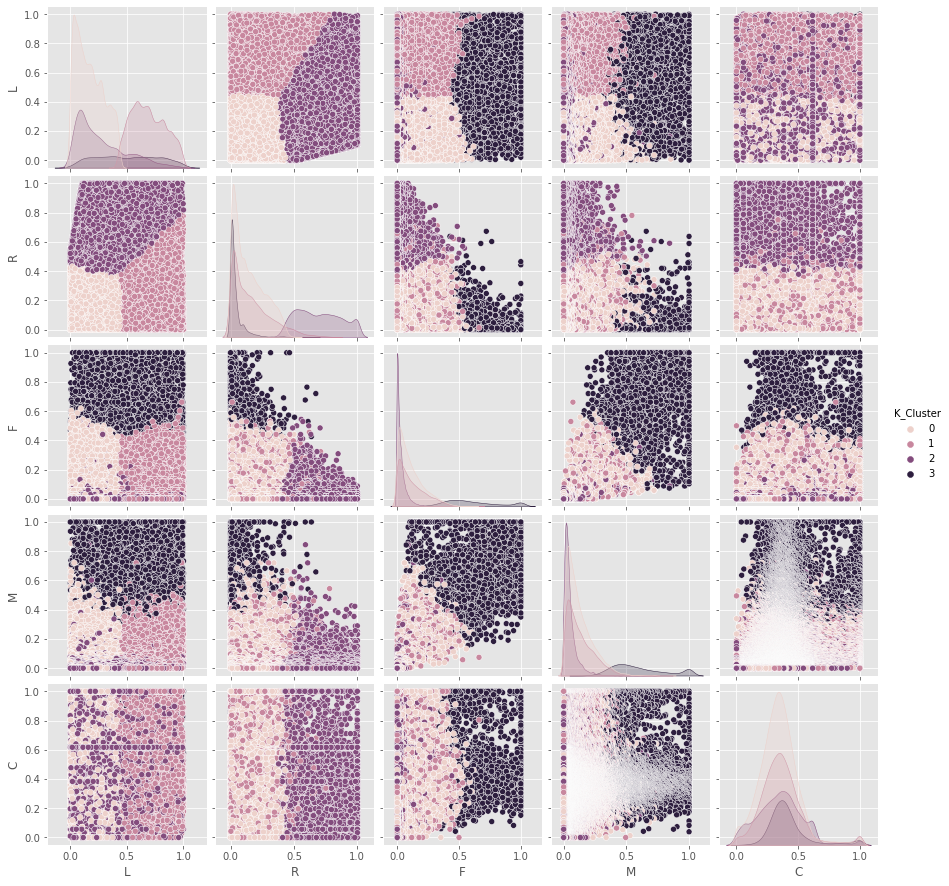

In [ ]:
sns.pairplot(data=data_c, hue='K_Cluster')

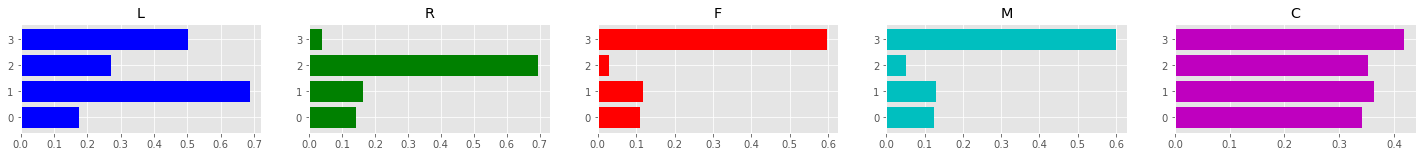

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

<b>KMEANS</b>

3 = Loyal <br>
2 = General & Low Value<br>
1 = Important<br>
0 = Potential<br>

### - GMM (Gaussian Mixture Models)

Gaussian Mixture Model (GMM) adalah sebuah
tipe density model yang terdiri dari komponen fungsifungsi Gaussian [2]. Komponen fungsi ini terdiri dari
weight yang berbeda untuk menghasilkan multi-model
density. Pada penelitian ini GMM digunakan untuk
memodelkan warna-warna background dari tiap
piksel.
Tiap piksel memiliki GMM-nya sendiri dan data
yang diolah adalah warna piksel yang didapat dari
input. Model-model GMM terbentuk dari data warna
piksel berdasarkan waktu. Model yang terbentuk
dibagi menjadi 2 bagian, model background dan
model non-background. Model background adalah
model yang mencerminkan background. 

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=142, covariance_type='full').fit(df_std)
prediction_gmm = gmm.predict(df_std)
probs = gmm.predict_proba(df_std)
data_d=df_std.assign(GMM_Cluster = prediction_gmm)
data_labelg=df_lrfmc.assign(GMM_Cluster = prediction_gmm)

In [ ]:
data_g=data_d.groupby('GMM_Cluster').mean()
data_g['count']=pd.value_counts(data_d['GMM_Cluster'])

In [ ]:
data_g

,L,R,F,M,C,count
GMM_Cluster,,,,,,
0,0.329891,0.413362,0.019805,0.033358,0.342307,25138
1,0.459299,0.049613,0.450279,0.467471,0.390131,11176
2,0.619716,0.138502,0.137529,0.144287,0.390669,11330
3,0.156074,0.210185,0.126529,0.142131,0.332699,14400


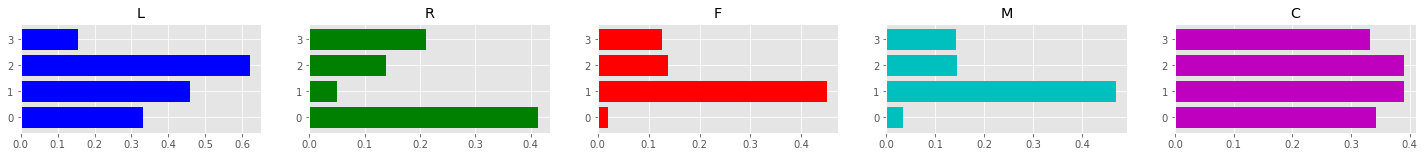

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_d.groupby('GMM_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

<b>PCA</b>

In [ ]:
x=data_c.drop('K_Cluster', axis=1)

CPU times: user 2.46 s, sys: 154 ms, total: 2.62 s
Wall time: 851 ms


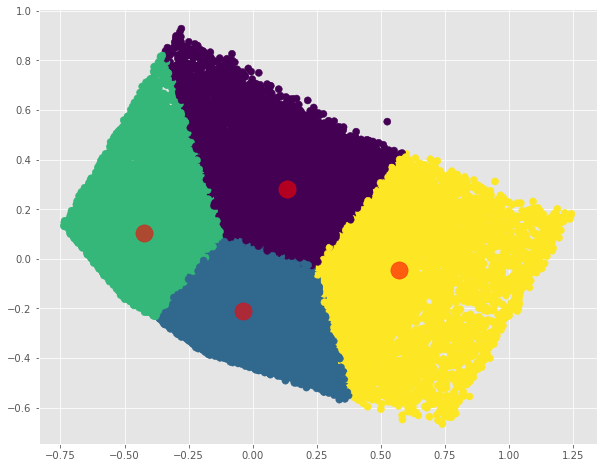

In [ ]:
#kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_std)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=150, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=data.assign(K_Cluster = prediction)
targets = [0, 1, 2,3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

menggunakan KMeans

In [ ]:
data_labeling=data.assign(K_Cluster = cluster_labels)

In [ ]:
cluster = [] #membuat list kosong
for i, k in data_labeling.iterrows(): #iterasi setiap row
    if k['K_Cluster'] == 0:
        cluster_name = 'Potential'
    elif k['K_Cluster'] == 3:
        cluster_name = 'Loyal'
    elif k['K_Cluster'] == 1:
        cluster_name = 'Important'
    else:
        cluster_name = 'Low Value'
    cluster.append(cluster_name)
    
data_labeling['cluster'] = cluster #membuat kolom dari list
data_label['cluster'] = cluster #membuat kolom dari list

In [ ]:
df_me=data_label.groupby(data_label['cluster']).mean()
df_me['count']=pd.value_counts(data_label['cluster'])
df_me

,MEMBER_NO,L,R,F,M,C,K_Cluster,count
cluster,,,,,,,,
Important,30468.263382,2473.695971,112.887747,9.974713,14207.299835,0.729703,1,16926
Low Value,31574.093598,1200.930878,477.956948,3.979112,6214.048553,0.717062,2,12543
Loyal,31351.190821,1909.643856,28.624116,44.687449,64936.634808,0.788239,3,6079
Potential,32123.585862,899.100657,99.066312,9.524230,13645.148626,0.704641,0,26496


# Evaluation (Insight) 

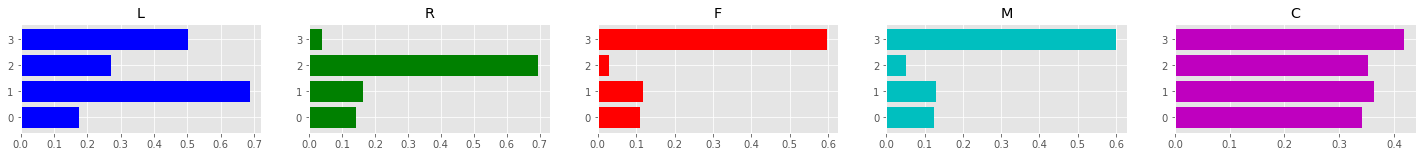

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

<b>KMEANS</b>

3 = Loyal <br>
2 = General & Low Value<br>
1 = Important<br>
0 = Potential<br>

<b>Loyal</b> ( L) cukup Lama, (R) Sangat Baru, (F) frekuensi tinggi, (M) Total perjalanan jauh, (C) Rata rata diskon sangat tinggi

<b>Potential</b> ( L) sangat baru, (R) cukup Baru, (F) frekuensi sedang, (M) Total perjalanan sedang, (C) Rata rata diskon sangat tinggi

<b>Important</b> ( L) sangat Lama, (R) cukup Baru, (F) frekuensi sedang, (M) Total perjalanan sedang, (C) Rata rata diskon cukup tinggi

<b>General & Low Value</b> ( L) belum terlalu lama, (R) Sangat lama, (F) frekuensi rendah, (M) Total perjalanan dekat, (C) Rata rata diskon cukup tinggi

### Rekomendasi